# PI09 Rotulação (*Label*)

# 1 - Definições

- Dada uma imagem binária e dada uma conectividade qualquer

    > o algortimo de rotulação retorna, para cada componente conexa, um inteiro positivo > zero distinto para cada componente conexa



# 2 - Algoritmo

1. Criar uma imagem de saída de zeros com a mesma dimensão da imagem de entrada
2. Criar um contator (cor) com valor inicial 1
3. Varrer a imagem na **order raster** até achar um pixel diferente de zero da imagem de entrada, que ainda não foi visitado
4. Incluir este pixel em uma pilha inicialmente vazia
5. Entrar em um laço onde a condição de saída é pilha vazia
    - desempilhar pixel e atribuir o contador (cor) ao pixel correspondente na imagem de saída
    - empilhar pixels vizinhos
6. Incrementar contador (cor) e voltar ao passo 3

In [1]:
import numpy as np      
import cv2 
import matplotlib.pyplot as plt
print(cv2.__version__)

4.7.0


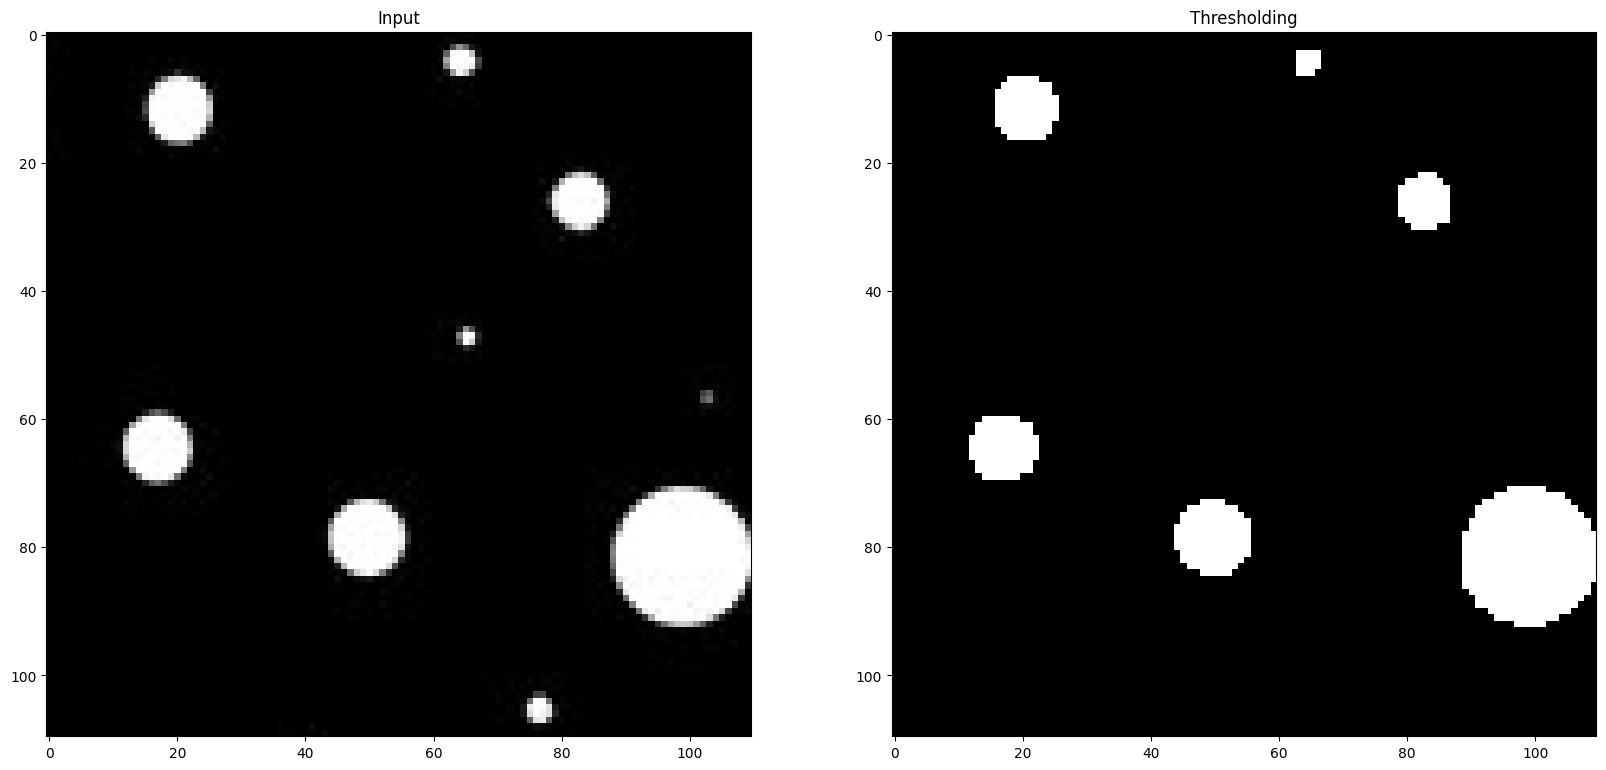

In [39]:
# https://drive.google.com/file/d/1-FMxiLB4TwkA_zvQLV12jRt34ZG1c6nT/view?usp=sharing
#!gdown --id 1-FMxiLB4TwkA_zvQLV12jRt34ZG1c6nT
f = cv2.imread('dots.jpg',0)
f = f[100:210,100:210]
T,img = cv2.threshold(f,0,255,cv2.THRESH_OTSU) #<<<<<<<<<<
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
plt.figure(figsize=(20,12)) 
plt.subplot(121),plt.imshow(f,"gray"),plt.title('Input')
plt.subplot(122),plt.imshow(opening,"gray"),plt.title('Thresholding')
plt.show()
img = opening

# Implementação myLabel

In [4]:
def myLabel(img):
  L,C = img.shape
  g = np.zeros(img.shape)
  cor = 1
  pilha = []
  tam_viz = 1 # vizinhança 3x3
  for l in range(L): # varre as linhas da imagem
    for c in range(C): # varre as colunas da image

      if img[l,c] and not g[l,c]: # buscar pixel de objeto não pintado

        pilha.append([l,c]) # colocar na pilha pixel p=[l,c]

        while pilha: # laço para pintar todos os pixel de CADA OBJETO com cor 

          i,j=pilha.pop() # retirar da pilha pixel q=[i,j]

          g[i,j] = cor

          for x in range(-tam_viz,tam_viz+1): # usando uma conectividade fixa 3x3
            for y in range(-tam_viz,tam_viz+1): # ATENÇÃO AQUI!!!

              viz_i = i+x
              viz_j = j+y
              if 0 <= viz_i < L and 0 <= viz_j < C: # está no domínio ?

                # colocar na pilha se é objeto e não foi pintado
                if img[viz_i,viz_j] and not g[viz_i,viz_j]: 

                  pilha.append([viz_i,viz_j]) 

        cor+=1 # incremento para pintar o próximo objeto


  return g

In [5]:
# download _morph.py from drive
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1FlMtAkb0npwmD54aCysLsxB84PehcKMe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1FlMtAkb0npwmD54aCysLsxB84PehcKMe
From (redirected): https://drive.google.com/uc?id=1FlMtAkb0npwmD54aCysLsxB84PehcKMe&confirm=t&uuid=50107e6c-64af-4960-8539-f41eea8d6664
To: /content/_morph.py
100% 39.2k/39.2k [00:00<00:00, 52.5MB/s]


In [6]:
from _morph import *

In [7]:
help(mm.label0)

Help on function label0 in module _morph:

label0(f, b=array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8))
    This function will be calculate label of each connect component
    input:
      - f: input image
      - b: structure element
    output:
      - y: image with op



In [8]:
help(mm.label)

Help on function label in module _morph:

label(f)
    This function will be calculate label of each connect component
    input:
      - f: input image
    output:
      - y: image with op



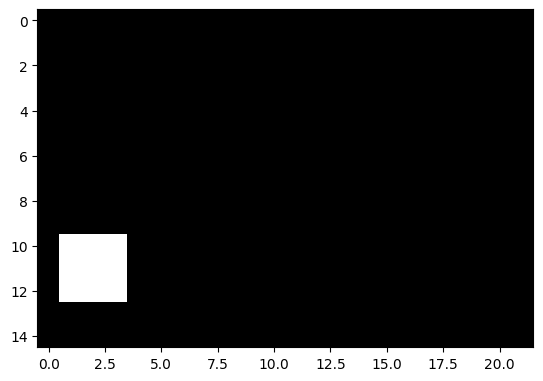

In [9]:
img0 = img[0:15,32:54] #<<< para debugar
_=plt.imshow(img0,"gray")

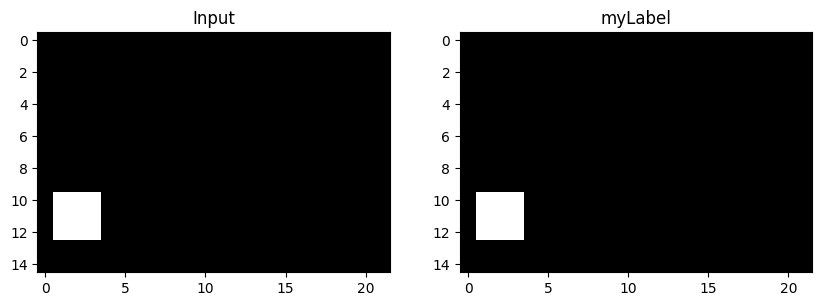

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 



In [10]:
plt.figure(figsize=(10,6)) 
plt.subplot(121),plt.imshow(img0,"gray"),plt.title('Input')
plt.subplot(122),plt.imshow(myLabel(img0),"gray"),plt.title('myLabel')
plt.show()
print(mm.drawImage(myLabel(img0).astype(int)))

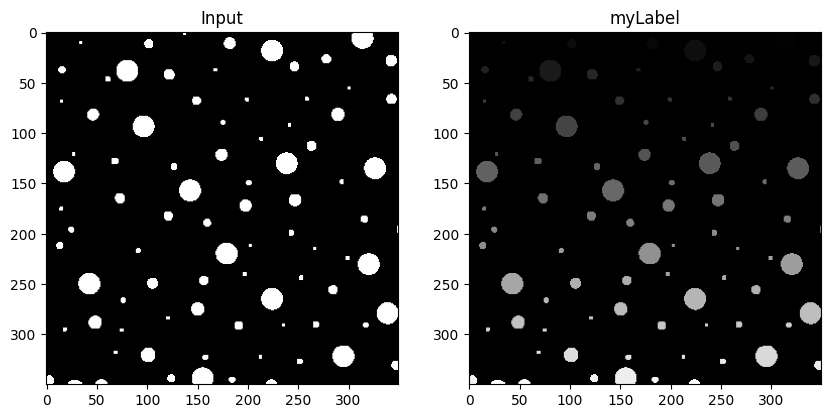

In [11]:
plt.figure(figsize=(10,6)) 
plt.subplot(121),plt.imshow(img,"gray"),plt.title('Input')
plt.subplot(122),plt.imshow(myLabel(img),"gray"),plt.title('myLabel')
plt.show()

86


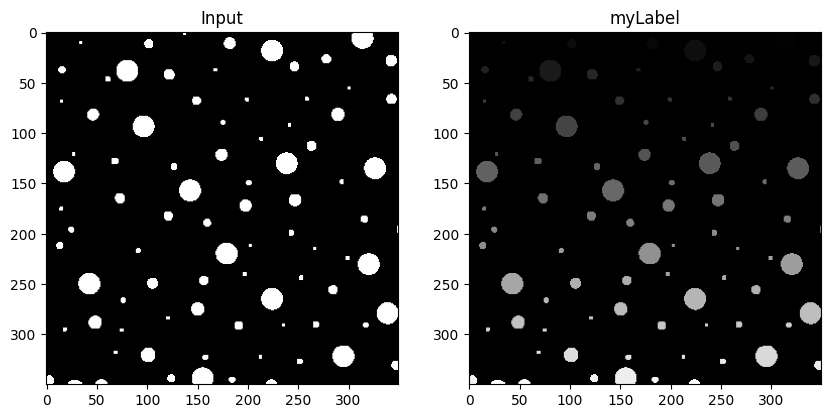

In [12]:
# da biblioteca morph
aux = mm.label0(img,mm.sebox(0)) # testar com outros tamanhos de vizinhanças
print(np.max(aux))
plt.figure(figsize=(10,6)) 
plt.subplot(121),plt.imshow(img,"gray"),plt.title('Input')
plt.subplot(122),plt.imshow(aux,"gray"),plt.title('myLabel')
plt.show()


# Exemplo 2: Implementação do OpenCV

## connectedComponents

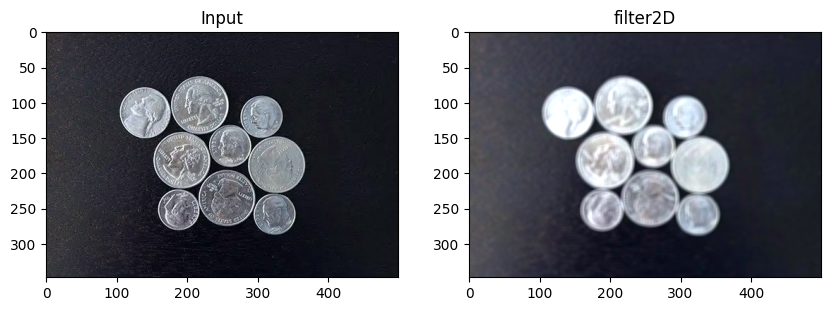

In [14]:
# fonte: https://docs.opencv.org/3.1.0/d3/db4/tutorial_py_watershed.html
import numpy as np
import cv2
from matplotlib import pyplot as plt
    
# https://drive.google.com/file/d/1b-b-Ft1orSXjUibuUYTLh5i_WZ7VvAMf/view?usp=sharing
#!gdown --id 1b-b-Ft1orSXjUibuUYTLh5i_WZ7VvAMf    
img = cv2.imread('coins.jpg')

kernel = np.ones((6,6),np.float32)/25

filter2D = cv2.filter2D(img,-1,kernel)

blur = cv2.blur(img,(5,5))

gaussianBlur = cv2.GaussianBlur(img,(5,5),0)

median = cv2.medianBlur(img,5)

bilateralFilter = cv2.bilateralFilter(img,13,99,99)

plt.figure(figsize=(10,6)) 
plt.subplot(121),plt.imshow(img,"gray"),plt.title('Input')
plt.subplot(122),plt.imshow(filter2D,"gray"),plt.title('filter2D')
plt.show()


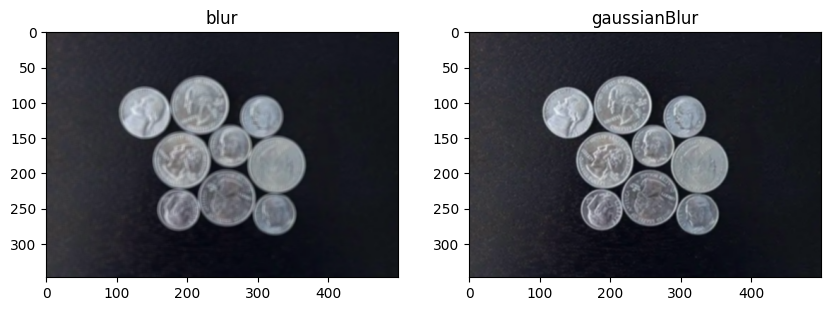

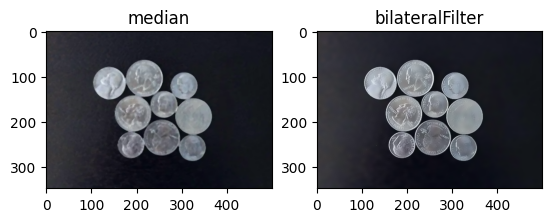

In [15]:
plt.figure(figsize=(10,6)) 
plt.subplot(121),plt.imshow(blur,"gray"),plt.title('blur')
plt.subplot(122),plt.imshow(gaussianBlur,"gray"),plt.title('gaussianBlur')
plt.show()
plt.subplot(121),plt.imshow(median,"gray"),plt.title('median')
plt.subplot(122),plt.imshow(bilateralFilter,"gray"),plt.title('bilateralFilter')
plt.show()

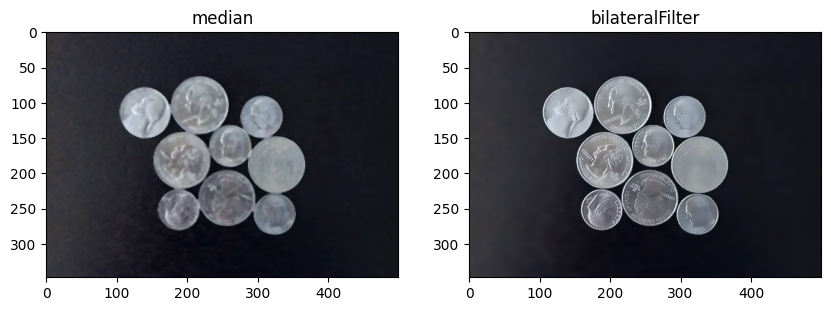

In [16]:
plt.figure(figsize=(10,6)) 
plt.subplot(121),plt.imshow(median,"gray"),plt.title('median')
plt.subplot(122),plt.imshow(bilateralFilter,"gray"),plt.title('bilateralFilter')
plt.show()

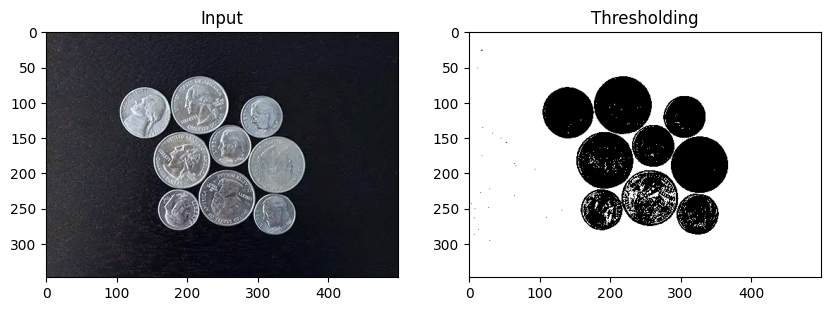

In [18]:
#img = bilateralFilter

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.figure(figsize=(10,6)) 
plt.subplot(121),plt.imshow(img,"gray"),plt.title('Input')
plt.subplot(122),plt.imshow(thresh,"gray"),plt.title('Thresholding')
plt.show()

In [19]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

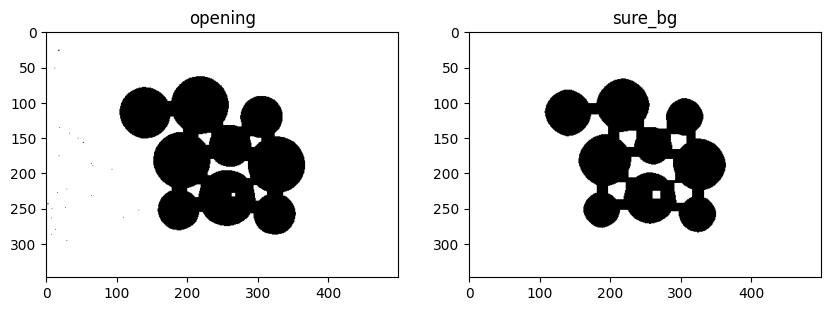

In [20]:
plt.figure(figsize=(10,6)) 
plt.subplot(121),plt.imshow(opening,"gray"),plt.title('opening')
plt.subplot(122),plt.imshow(sure_bg,"gray"),plt.title('sure_bg')
plt.show()

In [21]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

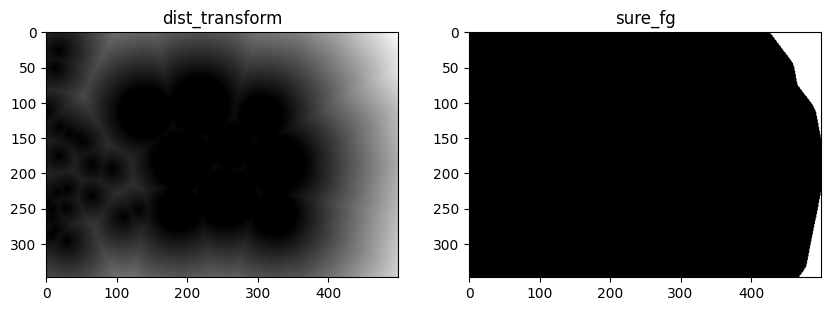

In [22]:
plt.figure(figsize=(10,6)) 
plt.subplot(121),plt.imshow(dist_transform,"gray"),plt.title('dist_transform')
plt.subplot(122),plt.imshow(sure_fg,"gray"),plt.title('sure_fg')
plt.show()

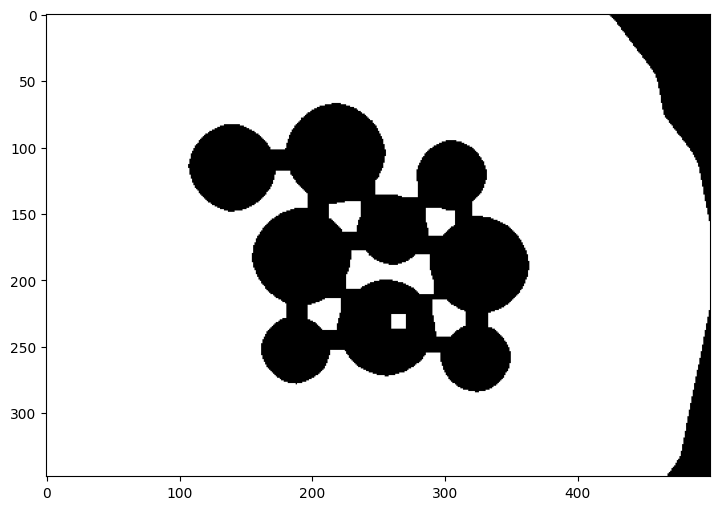

In [23]:
plt.figure(figsize=(10,6)) 
plt.imshow(unknown,"gray")

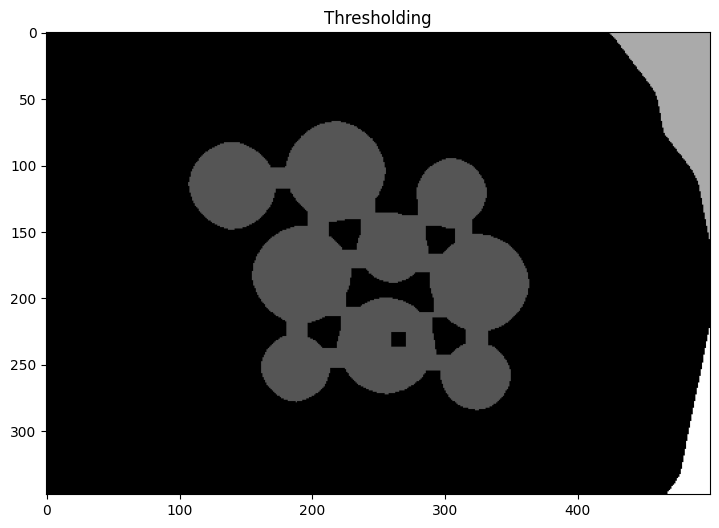

In [25]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

plt.figure(figsize=(10,6)) 

plt.imshow(markers,"gray"),plt.title('Thresholding')
plt.show()



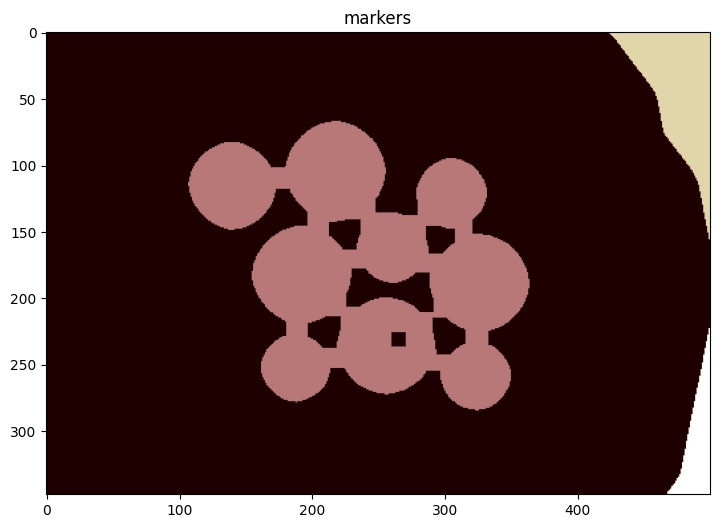

In [26]:
plt.figure(figsize=(10,6)) 
plt.imshow(markers,"pink"),plt.title('markers')
plt.show()

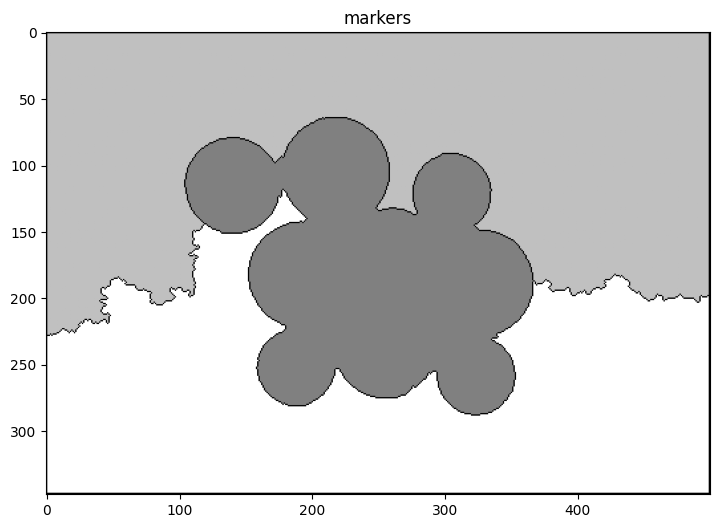

In [27]:
markers = cv2.watershed(img,markers)
plt.figure(figsize=(10,6)) 
plt.imshow(markers,"gray"),plt.title('markers')
plt.show()

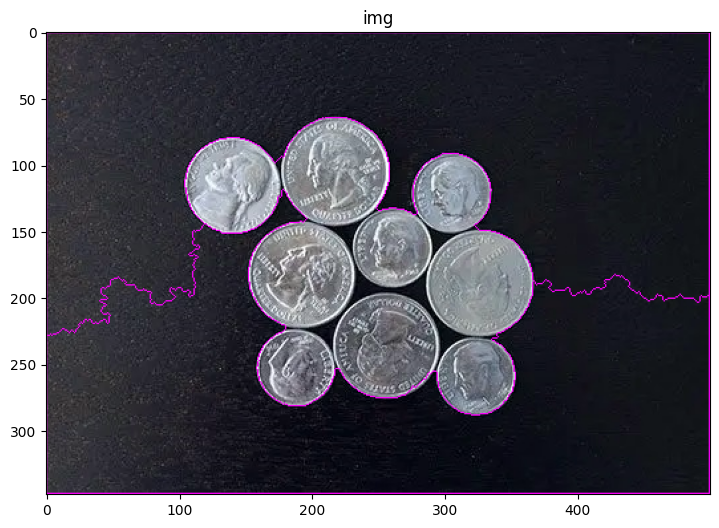

In [28]:
img[markers == -1] = [255,0,255]

plt.figure(figsize=(10,6)) 
plt.imshow(img,"gray"),plt.title('img')
plt.show()

# Exemplo 3: Implementação do OpenCV

## findContours

In [29]:
# instalar bibliotecas
if 0:
    !pip install image 
    !pip install matplotlib
    !pip install -U numpy
    !pip install opencv-python==3.4.11.39


In [30]:
import numpy as np      
import cv2      
import matplotlib.pyplot as plt
print(cv2.__version__)

4.7.0


/usr/local/lib/python3.9/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-FMxiLB4TwkA_zvQLV12jRt34ZG1c6nT
To: /content/rice.png
100% 84.8k/84.8k [00:00<00:00, 53.9MB/s]


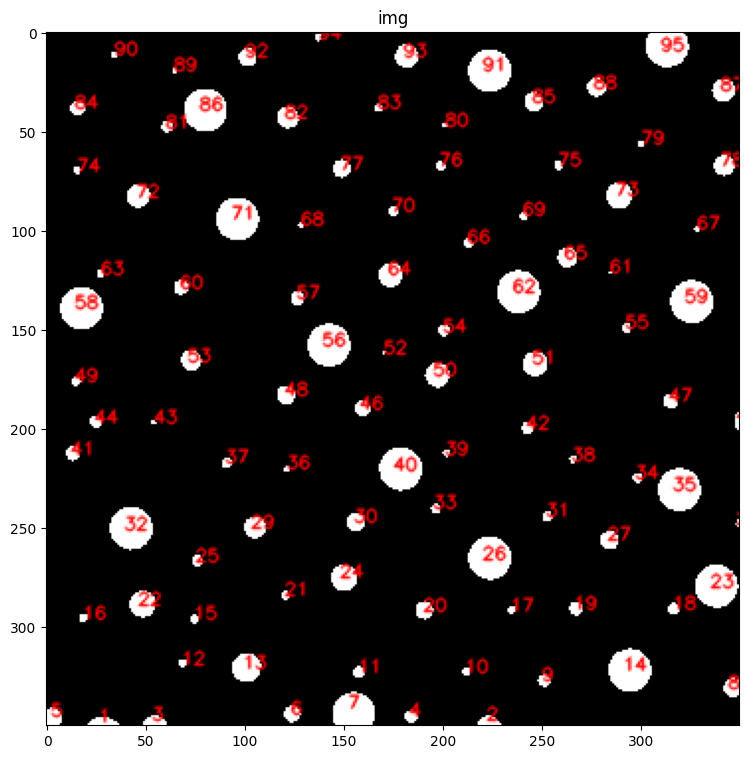

In [33]:
# mude o padrao aqui
padrao = cv2.RETR_LIST
font = cv2.FONT_HERSHEY_SIMPLEX

# https://drive.google.com/file/d/1-FMxiLB4TwkA_zvQLV12jRt34ZG1c6nT/view?usp=sharing
!gdown --id 1-FMxiLB4TwkA_zvQLV12jRt34ZG1c6nT
f = cv2.imread('dots.jpg',0)
img_teste = f[200:550,200:550]

T,img_teste = cv2.threshold(img_teste,0,255,cv2.THRESH_OTSU) #<<<<<<<<<<

img_canny = cv2.Canny(img_teste, 100, 200)
cont, _ = cv2.findContours(img_teste.copy(), padrao, cv2.CHAIN_APPROX_SIMPLE)

color_img = cv2.cvtColor(img_teste, cv2.COLOR_GRAY2RGB)

for k,c in enumerate(cont):
    x,y,w,h = cv2.boundingRect(c)
    cv2.putText(color_img, str(k+1),(x+w//3, y+h//2), font, 0.3,(255,0,0),1,cv2.LINE_AA)
  
plt.figure(figsize=(15,9)) 
plt.imshow(color_img,"gray"),plt.title('img')
plt.show()

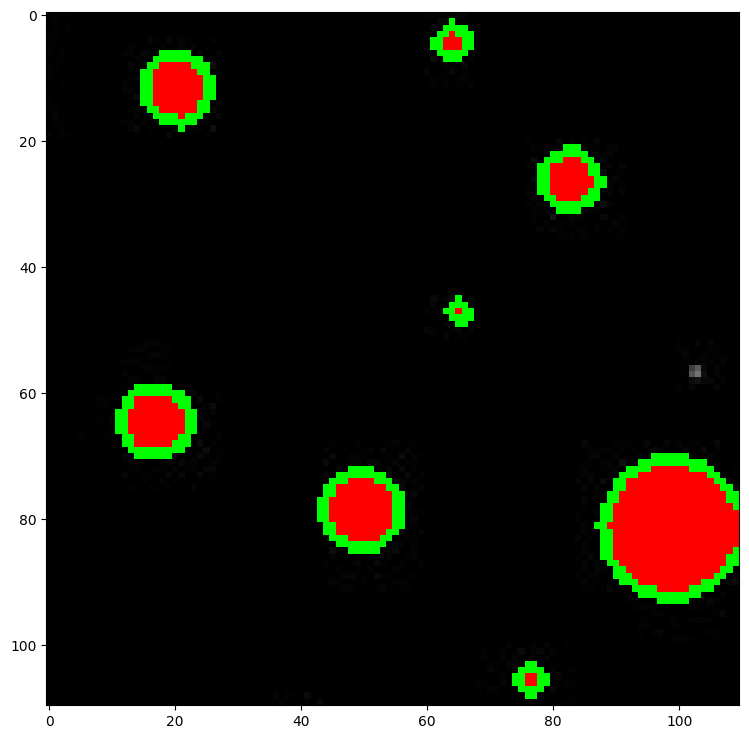

In [40]:
f0 = cv2.imread('dots.jpg')[100:210,100:210]
f = cv2.imread('dots.jpg',0)
img_teste = f[100:210,100:210]
T,img_teste = cv2.threshold(img_teste,0,255,cv2.THRESH_OTSU) #<<<<<<<<<<
img_canny = cv2.Canny(img_teste, 100, 200)

plt.figure(figsize=(15,9)) 
mm.show(f0,img_teste,mm.gradm(img_teste,mm.secross()))

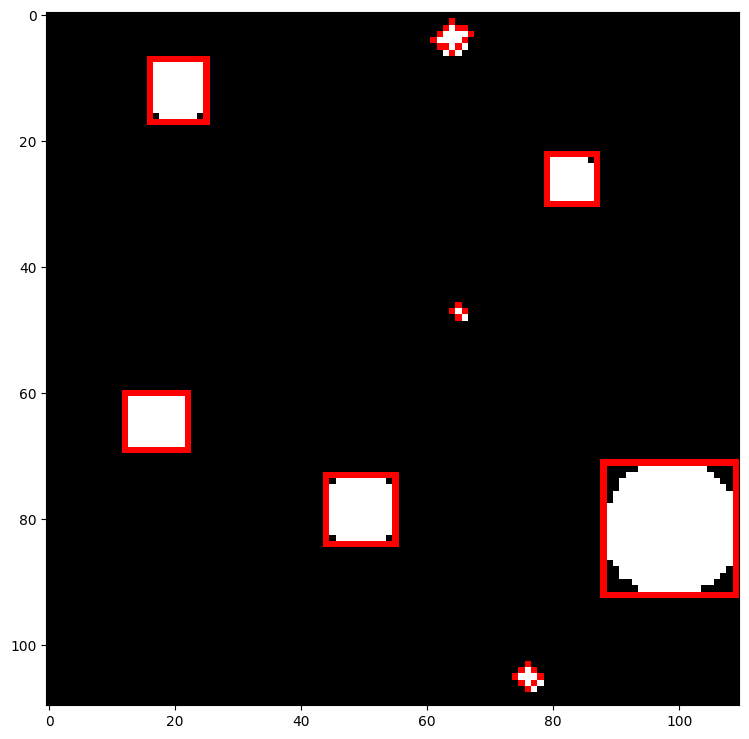

In [41]:
f0 = cv2.imread('dots.jpg')[100:210,100:210]
f = cv2.imread('dots.jpg',0)
img_teste = f[100:210,100:210]
T,img_teste = cv2.threshold(img_teste,0,255,cv2.THRESH_OTSU) #<<<<<<<<<<
img_canny = cv2.Canny(img_teste, 100, 200)

plt.figure(figsize=(15,9)) 
medidas = mm.blob(img_teste,'box')

# Exemplo 4: Implementação do skimage

## measures

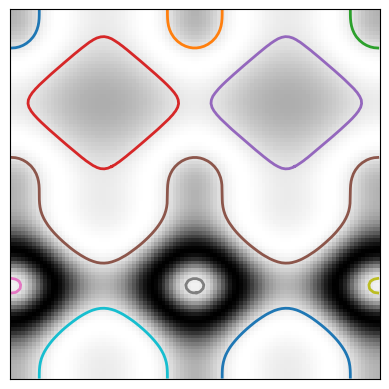

In [43]:
# fonte: http://scikit-image.org/docs/dev/auto_examples/edges/plot_contours.html
if False: 
    !pip install scikit-image
import numpy as np
import matplotlib.pyplot as plt

from skimage import measure #<<<<<<<<<<<<<<<<<<

# Construct some test data
x, y = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j]
r = np.sin(np.exp((np.sin(x)**3 + np.cos(y)**2)))

# Find contours at a constant value of 0.8
contours = measure.find_contours(r, 0.8) #<<<<<<<<<<<<<<<<<<

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(r, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

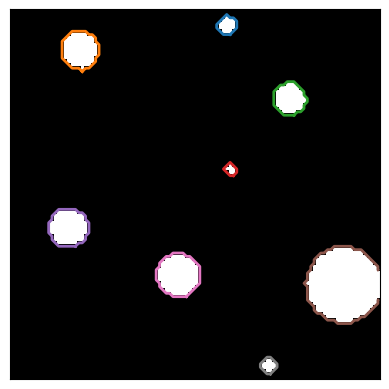

<Figure size 2000x2000 with 0 Axes>

In [44]:
r = img_teste
# Find contours at a constant value of 0.8
contours = measure.find_contours(r, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(r, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

plt.figure(figsize=(20,20)) 
ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

<Figure size 1500x900 with 0 Axes>

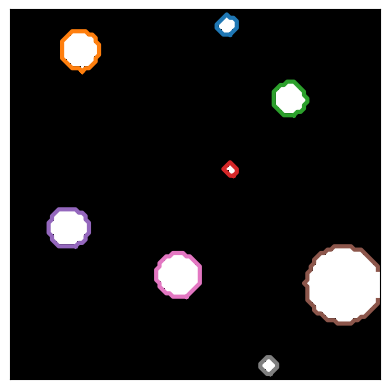

In [45]:
f = cv2.imread('dots.jpg',0)
img_teste = f[100:210,100:210]
T,img_teste = cv2.threshold(img_teste,0,255,cv2.THRESH_OTSU) #<<<<<<<<<<

plt.figure(figsize=(15,9)) 
mm.lblshow(img_teste)